In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
import sys 
sys.path.append('../dp_lab')
import mechanisms as ms
import ss_mechanisms as ms_ss
import utils

<AxesSubplot:ylabel='Density'>

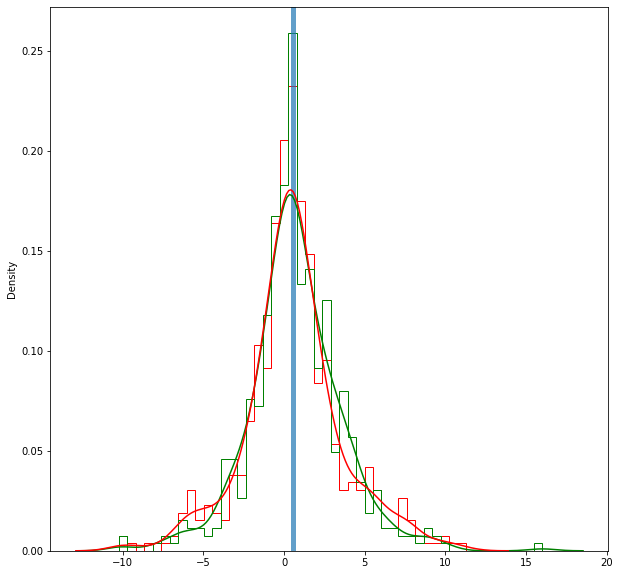

In [31]:
db = np.random.rand(50)
n_db = db 
n_db[np.random.randint(50)] = np.random.rand()

query_sensitivity = 1

epsilon = 0.5
delta = 0.001

query_results = mechanisms.laplace_DP_noise(db, np.median, 500, epsilon, 1)
n_query_results = mechanisms.laplace_DP_noise(n_db, np.median, 500, epsilon, 1)
plt.figure(figsize=(10,10))
plt.hist([query_results, n_query_results], histtype='step', bins=50, density=True, color=["green","red"])
plt.axvline(np.median(db), linewidth = 5, alpha=0.7)
sns.kdeplot(query_results, color="green")
sns.kdeplot(n_query_results,color="red")

<AxesSubplot:ylabel='Density'>

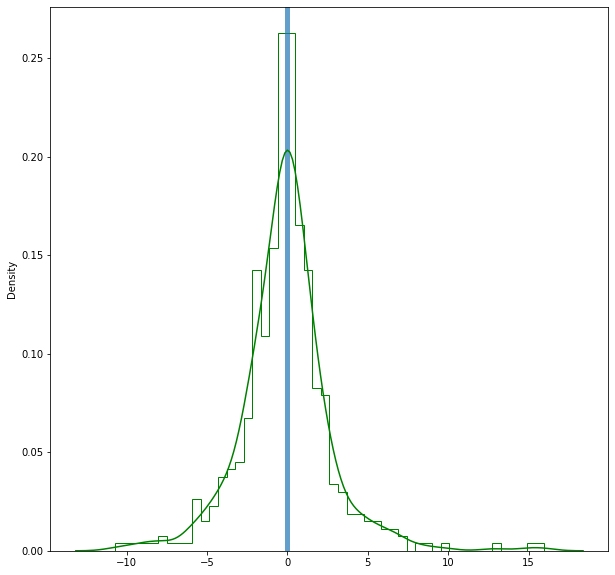

In [34]:
db = np.concatenate([np.zeros(60), np.ones(10)])
#n_db = db 
#n_db[np.random.randint(50)] = np.random.rand()

query_sensitivity = 1

epsilon = 0.5
delta = 0.001

query_results = mechanisms.laplace_DP_noise(db, np.median, 500, epsilon, 1)
#n_query_results = mechanisms.laplace_DP_noise(n_db, np.median, 500, epsilon, 1)
plt.figure(figsize=(10,10))
plt.hist([query_results], histtype='step', bins=50, density=True, color=["green"])
plt.axvline(np.median(db), linewidth = 5, alpha=0.7)
sns.kdeplot(query_results, color="green")
#sns.kdeplot(n_query_results,color="red")

In [50]:
def median_ss(data, beta):
    m = utils.median_index(data)
    n = data.size
    data_ = np.concatenate([np.zeros(np.abs(m-n-1)), data, np.max(data)*np.ones(m+1)])
    m_ = utils.median_index(data)
    return np.max([np.exp(-k*beta)*np.max([(data_[m_+t]-data_[m+t-k-1]) for t in range(k+1)]) for k in range(n)])

In [15]:
    data = np.array([1,2,3])
    beta = 1
    m = utils.median_index(data)
    n = data.size
    data_ = np.concatenate([np.zeros(np.abs(m-n-1)), data, np.max(data)*np.ones(m+1)])
    m_ = utils.median_index(data)
    np.max([np.exp(-k*beta)*np.max([(data_[m_+t]-data_[m+t-k-1]) for t in range(k+1)]) for k in range(n)])


1.0

In [52]:
def laplace_DP_noise_ss(data: np.ndarray, epsilon, delta, query, ss, size):
    ''' 
        Smooth Sensitivity mechanism to achive epsilon-DP using 
        the Laplace distribution as admisible noise distribution
    
    Args:
        data (ndarray): array to apply the query
        epsilon (float): privacy budget
        query (function): query to apply
        ss (function): beta-smooth upper bound function
        size (int): number of query calls.
    Returns:
        query result with added noise
         
    '''
    beta = epsilon/(2*np.log(2/delta))
    alpha = epsilon/2
    unif = np.random.rand(size)
    smooth_sensitivity = ss(data, beta)
    laplace_noise = np.array([np.sign(unif[i]-0.5)*np.log(1-2*np.abs(unif[i]-0.5)) for i in range(size)])
    print(smooth_sensitivity)
    return query(data) + smooth_sensitivity/alpha*laplace_noise 

In [34]:
DATA = np.random.rand(50)
result = laplace_DP_noise_ss(DATA, 0.5, 0.01, np.median, median_ss, 500)

0.711185519429291


<AxesSubplot:ylabel='Density'>

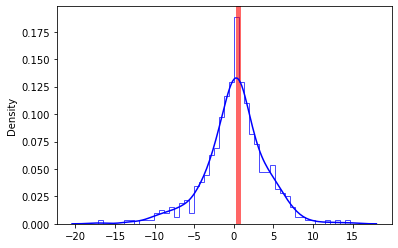

In [35]:
plt.hist(result, bins = 50, histtype='step', density=True, color="blue", alpha=0.7)
plt.axvline(DATA[utils.median_index(DATA)], color = 'red', linewidth = 5, alpha = 0.6)
sns.kdeplot(result, color="blue")

0.5950959023533812


<AxesSubplot:ylabel='Density'>

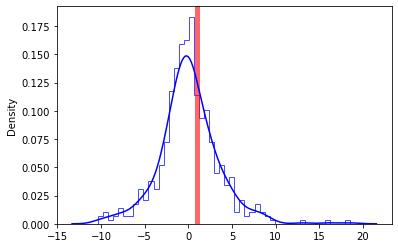

In [51]:
DATA = np.concatenate([np.zeros(11), np.ones(10)])
result = laplace_DP_noise_ss(DATA, 0.5, 0.01, np.median, median_ss, 500)
plt.hist(result, bins = 50, histtype='step', density=True, color="blue", alpha=0.7)
plt.axvline(DATA[utils.median_index(DATA)], color = 'red', linewidth = 5, alpha = 0.6)
sns.kdeplot(result, color="blue")

0.354139132997785


<AxesSubplot:ylabel='Density'>

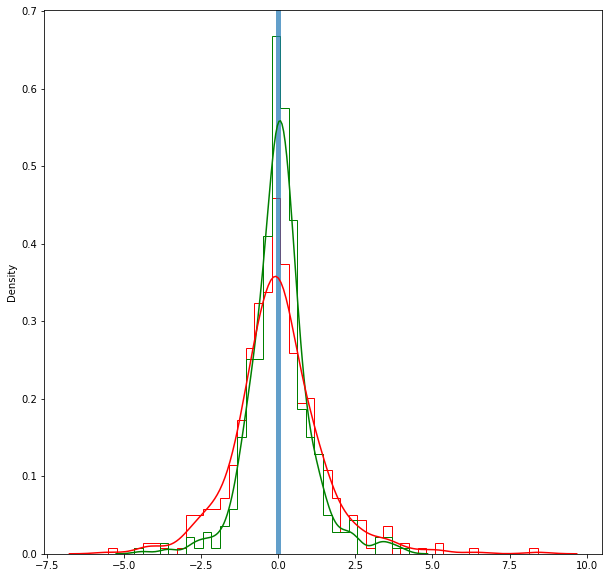

In [49]:
db = np.concatenate([np.zeros(11), np.ones(10)])
n_db = np.concatenate([np.zeros(10), np.ones(11)])

epsilon = 1
delta = 0.001

query_results = laplace_DP_noise_ss(db, epsilon, 0.01, np.median, median_ss, 500)
n_query_results = ms.laplace_DP_noise(db, np.median, 500, epsilon, 1)
plt.figure(figsize=(10,10))
plt.hist([query_results, n_query_results], histtype='step', bins=50, density=True, color=["green","red"])
plt.axvline(np.median(db), linewidth = 5, alpha=0.7)
sns.kdeplot(query_results, color="green")
sns.kdeplot(n_query_results,color="red")